<h1>25 Insights on UK Road Accident</h1>
<hr>
<h2>Name: Jeanne Nicole Gianan</h2>
<h2>Activity #2</h2>

<h3>Import Necessary Libraries
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h3>Import the Data</h3>

In [2]:
accidents = pd.read_csv('datasets/uk_road_accident.csv')

In [3]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h3>Study the data</h3>

In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h3>Prepare the Data</h3>
<hr>
<p>Fill up null values and change appropriate data type</p>

In [7]:
accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [8]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mean())
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mean())
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Road_Type'] = accidents['Road_Type'].fillna(accidents['Road_Type'].mode()[0])
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna(accidents['Weather_Conditions'].mode()[0])

In [9]:
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3>Analyzing the Data</h3>
<hr>
<p>Now that the data is clean we can now start on analyzing the data</p>

In [10]:
accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

<h2>1. How many accidents occur in wet roads in daylight?</h2>

In [11]:
acc = accidents[(accidents['Road_Surface_Conditions'] == 'Wet or damp') & (accidents['Light_Conditions'] == 'Daylight')]
acc

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
18,200701BS68210,Slight,20-11-2019,51.497590,Daylight,Kensington and Chelsea,-0.159138,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Motorcycle over 125cc and up to 500cc
24,200701BS70003,Serious,17-01-2019,51.498157,Daylight,Kensington and Chelsea,-0.201473,1,1,Wet or damp,Dual carriageway,Urban,Raining no high winds,Car
27,200701BS70006,Slight,6/1/2019,51.490526,Daylight,Kensington and Chelsea,-0.196443,2,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Taxi/Private hire car
34,200701BS70013,Slight,8/1/2019,51.498244,Daylight,Kensington and Chelsea,-0.201325,1,1,Wet or damp,Single carriageway,Urban,Other,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660640,201091NL04667,Slight,21-08-2022,60.153353,Daylight,Shetland Islands,-1.261295,3,2,Wet or damp,Single carriageway,Rural,Raining + high winds,Car
660644,201091NL05795,Slight,15-10-2022,60.254095,Daylight,Shetland Islands,-1.293355,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Car
660647,201091NL06131,Slight,3/11/2022,60.195539,Daylight,Shetland Islands,-1.258363,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car
660673,201091NM01190,Slight,2/2/2022,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car


In [12]:
acc['District Area'].value_counts()

District Area
Birmingham                   2136
Leeds                        1275
Manchester                   1145
Bradford                     1094
Sheffield                    1076
                             ... 
Berwick-upon-Tweed             32
Shetland Islands               28
Orkney Islands                 27
Clackmannanshire               20
London Airport (Heathrow)      20
Name: count, Length: 422, dtype: int64

<h2>Insight #1</h2>
<h3>The total accidents happen in daylight with a wet or damp road condition are a total of 114,119 with the majority of it happening in the Birmingham district.</h3>

<h2>2. Which vehicle types are involved in accidents with more than 3 casualties?</h2>

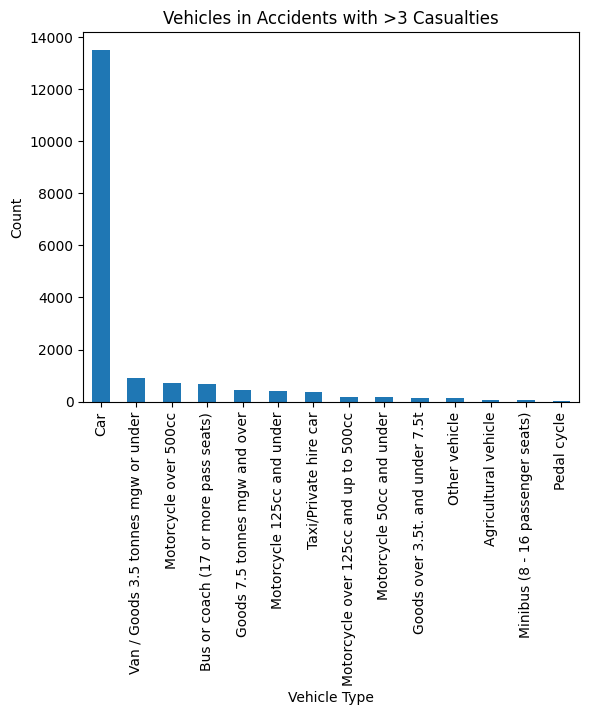

In [44]:
accidents[accidents["Number_of_Casualties"]>3]["Vehicle_Type"].value_counts().plot(kind="bar")
plt.title("Vehicles in Accidents with >3 Casualties")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

<h2>Insight #2</h2>
<h3>Car with a wide margin are usually inlvolved in accident having more than 3 casualties.</h3>

<h2>3. Is there a correlation between number of vehicles and casualties?</h2>

In [14]:
accidents[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h2>Insight #3</h2>
<h3>There are no correlation between the number of vehicles involved with the number of casualties.</h3>

<h2>4. What's the max number of vehicles involved in accidents per severity?</h2>

In [15]:
accidents.groupby('Accident_Severity')['Number_of_Vehicles'].max()

Accident_Severity
Fatal      28
Serious    19
Slight     32
Name: Number_of_Vehicles, dtype: int64

<h2>Insight #4</h2>
<h3>The maximum number of vehicles involved in terms of severity are 32, higher that the fatal severity despite it being the least sever.</h3>

<h2>5. What's the minimum number of casualties in accidents on icy roads</h2>

In [16]:
accidents[accidents['Road_Surface_Conditions'] == 'Snow']['Number_of_Casualties'].min()

np.int64(1)

<h2>Insight #5</h2>
<h3>The minimum number of casualties recorded on icy roads are 1.</h3>

<h2>6. What is the count of each vehicle type in rural areas</h2>

In [17]:
accidents[accidents['Urban_or_Rural_Area'] == 'Rural']['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      181922
Van / Goods 3.5 tonnes mgw or under       12156
Bus or coach (17 or more pass seats)       9025
Motorcycle over 500cc                      8957
Goods 7.5 tonnes mgw and over              6156
Motorcycle 125cc and under                 5023
Taxi/Private hire car                      4677
Motorcycle 50cc and under                  2710
Motorcycle over 125cc and up to 500cc      2674
Goods over 3.5t. and under 7.5t            2232
Other vehicle                              1994
Minibus (8 - 16 passenger seats)            718
Agricultural vehicle                        675
Pedal cycle                                  70
Ridden horse                                  1
Name: count, dtype: int64

<h2>Insight #6</h2>
<h3>Car is the most common vehicle type in rural area with the total number of 1811922 and the least vehicle type is riddent horse with only 1 person using.</h3>

<h2>7. What is the average number of casualties per accident?</h2>

In [18]:
accidents['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h2>Insight #7</h2>
<h3>The average number of casualties per accident are no more than 1.</h3>

<h2>8. What is the distribution of accident severities?</h2>

In [19]:
accidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

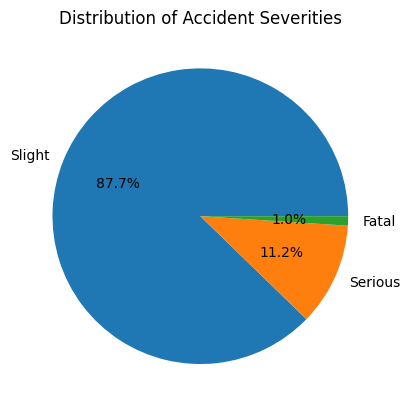

In [49]:
acc["Accident_Severity"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Accident Severities")
plt.ylabel("")
plt.show()


<h2>Insight #8</h2>
<h3>We can say that majority of the accident only has a slight severity having a large margin with fatal severity.</h3>

<h2>9. What are the most common light conditions during accidents?</h2>

In [20]:
accidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2>Insight #9</h2>
<h3>Daylight is the most common light condition during accidents, with the least being Darkness - lights unlit. We can safely deduce that people are more careful when they are in a situation that accidents are prone to happen.</h3>

<h2>10. What are the top 5 most common vehicle types involve in accidents?</h2>

In [21]:
accidents['Vehicle_Type'].value_counts().head(5)

Vehicle_Type
Car                                     497992
Van / Goods 3.5 tonnes mgw or under      34160
Bus or coach (17 or more pass seats)     25878
Motorcycle over 500cc                    25657
Goods 7.5 tonnes mgw and over            17307
Name: count, dtype: int64

<h2>Insight #10</h2>
<h3>The top 5 are as listed, Car being the first because of the amount of people using car nowadays, 2nd being the van, 3rd is the bus, 4th is the motorcycle and lastly are the goods 7.5 tonnes mgw and over </h3>

<h2>11. What is the average number of vehicles involved in accidents?</h2>

In [22]:
accidents['Number_of_Vehicles'].mean()

np.float64(1.8312554205597575)

<h2>Insight #11</h2>
<h3>The average number of vehicles involved per accident is 1.83, we can round it off to 2 vehicles per accident.</h3>

<h2>12. What is the median numbers of casualties in urban areas?</h2>

In [23]:
accidents[accidents['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'].median()

np.float64(1.0)

<h2>Insight #12</h2>
<h3>The median number of casualties in urban areas is 1.</h3>

<h2>13. What is the maximum number of casualties recorded in a single accident?</h2>

In [24]:
accidents['Number_of_Casualties'].max()

np.int64(68)

<h2>Insight #13</h2>
<h3>In the 660679 rows of data the highest number of casualties recorded in a single accident is 68.</h3>

<h2>14. How many accidents happened under each road surface condition?</h2>

In [25]:
accidents['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h2>Insight #14</h2>
<h3>Depite having a dry surface, the amount of accidents happen in dry surface are 448547, which is more than half of the data provided.</h3>

<h2>15. What is the average number of casualties by accident severity?</h2>

In [26]:
accidents.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2>Insight #15</h2>
<h3>Fatal severity being the highest with the number of 2, which means that every accident that has fatal severity, there are at least 2 casualties recorded.</h3>

<h2>16. Which vehicle types are most involved in severe accidents?</h2>

In [27]:
accidents[accidents['Accident_Severity'] == accidents['Accident_Severity'].max()]['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      424954
Van / Goods 3.5 tonnes mgw or under       29139
Bus or coach (17 or more pass seats)      22180
Motorcycle over 500cc                     21861
Goods 7.5 tonnes mgw and over             14770
Motorcycle 125cc and under                13049
Taxi/Private hire car                     11368
Motorcycle over 125cc and up to 500cc      6537
Motorcycle 50cc and under                  6494
Goods over 3.5t. and under 7.5t            5172
Other vehicle                              4800
Minibus (8 - 16 passenger seats)           1671
Agricultural vehicle                       1644
Pedal cycle                                 152
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2>Insight #16</h2>
<h3>Car being the most common vehicle type are also commonly involve with severe accidents.</h3>

<h2>17. What is the maximum casualties by road type?</h2>

In [28]:
accidents.groupby('Road_Type')['Number_of_Casualties'].max()

Road_Type
Dual carriageway      47
One way street        15
Roundabout            19
Single carriageway    62
Slip road             68
Name: Number_of_Casualties, dtype: int64

<h2>Insight #17</h2>
<h3>Slip road has the most casualties recorded and one way street being the least.</h3>

<h2>18. Which weather condition occurs the most in Kensington and Chelsea?</h2>

In [29]:
accidents[accidents["District Area"]=="Kensington and Chelsea"]["Weather_Conditions"].value_counts()

Weather_Conditions
Fine no high winds       2373
Raining no high winds     345
Other                      49
Fine + high winds          14
Snowing no high winds      11
Raining + high winds        7
Name: count, dtype: int64

<h2>Insight #18</h2>
<h3>The most common weather conditions where accidents happen in district of Kensington and Chealsea are Fine no high winds and the least being Raning + high winds. </h3>

<h2>19. In the Aberdeenshire district, which road type has the most frequent road accident?</h2>

In [30]:
accidents[accidents["District Area"]=="Aberdeenshire"]["Road_Type"].value_counts()

Road_Type
Single carriageway    1713
Dual carriageway       179
Roundabout              22
Slip road               10
One way street           6
Name: count, dtype: int64

<h2>Insight #19</h2>
<h3>Single carriageway is the most frequent road type where accidents happen in Aberdeenshire district</h3>

<h2>20. How many vehicles and casualties are usually involved in accidents with fatal severity?</h2>

In [31]:
serious_data = accidents[accidents["Accident_Severity"]=="Serious"]
avg_vehicles = serious_data["Number_of_Vehicles"].mean()
avg_casualties = serious_data["Number_of_Casualties"].mean()
serious_data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
5,200701BS67159,Serious,18-09-2019,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,11/2/2022,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car
660645,201091NL05842,Serious,18-10-2022,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car
660672,201091NM01085,Serious,29-01-2022,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [32]:
avg_casualties

np.float64(1.46727954929322)

In [33]:
avg_vehicles

np.float64(1.6783273065282203)

<h2>Insight #20</h2>
<h3>There are usually 1.47 casualties and 1.69 vehicles involved in serious severity accidents.</h3>

In [34]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [35]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayofWeek'] = accidents['Accident Date'].dt.dayofweek #Monday = 0, Sunday = 6

In [36]:
accidents.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayofWeek                  395672
dtype: int64

<h2>21. What year has the highest number of accidents?</h2>

In [37]:
accidents['Year'].value_counts()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h2>Insight #21</h2>
<h3>The year 2019 has the highest number of accidents recorded.</h3>
<hr>
<h2>Insight #22</h2>
<h3>We can observe that ever since 2019 the number of accidents steadily decreases.</h3>
<hr>
<h2>Insight #23</h2>
<h3>There is a notably large amount of difference from 2019 with a number of 71867 compared to the year 2022 with a number of 56805. Their total difference is 15062.</h3>

<h2>22. Which day of the week has the most accidents?</h2> 

In [38]:
accidents['DayofWeek'].value_counts()

DayofWeek
5.0    43164
2.0    40037
4.0    39822
3.0    39641
1.0    38714
6.0    35065
0.0    28564
Name: count, dtype: int64

<h2>Insight #24</h2>
<h3>Saturday has the most accidents during the week, while monday has the least.</h3>

<h2>23. Which specific date has the most highest number of accident? </h2>

In [39]:
accidents["Accident Date"].value_counts().head(5)

Accident Date
2021-02-11    685
2021-10-06    680
2019-12-06    678
2019-02-01    676
2021-12-04    667
Name: count, dtype: int64

<h2>Insight #25</h2>
<h3>We can observe that although different year they have common months, which is december and february. We know that in other country, from Dec to March is winter season, which mean that the most highest number of accident happens during the winter season.</h3>
<hr>
<h2>Insight #26</h2>
<h3>There is however a outlier which is the date October 6, 2021, which if we search there are not any event happening that contributes to the amount of accident happened in that day.</h3>